<a href="https://colab.research.google.com/github/uyan21/deepLearningStudy/blob/main/deepLearning_stock1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

딥러닝으로 주식단타 예측이 가능한가

In [ ]:
#주가 정보 크롤링을 위해서 url 입력
code="195990"
url="https://finance.naver.com/item/sise_day.nhn?code="+code

import requests
from bs4 import BeautifulSoup
from openpyxl import Workbook
import pandas as pd
import matplotlib.pyplot as plt
#엑셀에 따로쓰기 위함
wb=Workbook()
ws=wb.active

In [ ]:
#1~129페이지 까지 긁는다
#액면 분할 이후 데이터 취급 주의
for i in range(1,130):
  tmplist=[]
  tmp=0
  source=requests.get(url+"&page="+str(i)).text

  soup=BeautifulSoup(source,"html.parser")
  html=soup.select("table.type2")
  for t in html:
    text=t.get_text().replace("\t","")
    while "\n\n" in text:
      text=text.replace("\n\n","\n")
  text=text[1:]
  textlist=text.split("\n")
  if i>1:
    textlist=textlist[7:]

  for t in textlist:
    tmplist.append(t)
    tmp+=1
    if tmp>6:
      print(tmplist)
      ws.append(tmplist)
      tmplist=[]
      tmp=0
  print(i)
  wb.save("drive/MyDrive/stock1.xlsx")

['날짜', '종가', '전일비', '시가', '고가', '저가', '거래량']
['2020.11.30', '2,625', '35', '2,585', '2,785', '2,555', '53,469,775']
['2020.11.27', '2,660', '75', '2,530', '2,900', '2,355', '249,131,360']
['2020.11.26', '2,735', '265', '3,225', '3,400', '2,455', '296,816,475']
['2020.11.25', '3,000', '0', '0', '0', '0', '0']
['2020.11.24', '3,000', '115', '3,030', '3,360', '2,720', '297,098,469']
['2020.11.23', '2,885', '370', '2,945', '3,265', '2,660', '208,996,869']
['2020.11.20', '2,515', '0', '0', '0', '0', '0']
['2020.11.19', '2,515', '580', '2,035', '2,515', '2,030', '268,356,706']
['2020.11.18', '1,935', '445', '1,730', '1,935', '1,585', '291,354,377']
['2020.11.17', '1,490', '125', '1,520', '1,540', '1,380', '46,306,155']
1
['2020.11.16', '1,365', '70', '1,300', '1,365', '1,240', '23,113,489']
['2020.11.13', '1,295', '95', '1,420', '1,425', '1,235', '35,217,538']
['2020.11.12', '1,390', '245', '1,250', '1,460', '1,155', '424,589,569']
['2020.11.11', '1,145', '65', '1,080', '1,350', '1,040', '35

In [ ]:
#크롤링한 엑셀 데이터 읽어옴
df=pd.read_excel("drive/MyDrive/stock1.xlsx")
print(df['종가'])

0        2,625
1        2,660
2        2,735
3        3,000
4        3,000
         ...  
1285    16,050
1286    16,900
1287    17,000
1288    16,900
1289    16,800
Name: 종가, Length: 1290, dtype: object


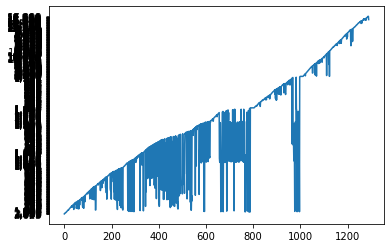

In [ ]:
#종가 데이터 그래프 출력(정규화 필요함)
plt.plot(df['종가'])
plt.show()

In [ ]:
#정규화를 위해 ,빼고 문자열 float으로 형변환
df=pd.read_excel("drive/MyDrive/stock1.xlsx")
for i in range(1,7):
  df.iloc[:,i]=df.iloc[:,i].str.replace(pat=',', repl='', regex=False)
df.iloc[:,1:]=df.iloc[:,1:].astype(float)

In [ ]:
#확인
df.iloc[:,1]

0        2625
1        2660
2        2735
3        3000
4        3000
        ...  
1285    16050
1286    16900
1287    17000
1288    16900
1289    16800
Name: 종가, Length: 1290, dtype: object

In [ ]:
#날짜를 제외한 모든 데이터 정규화(nomalization)
for k in range(1,7):
  for i in range(len(df.iloc[:,1])):
    df.iloc[:,k][i]=(df.iloc[:,k][i]-min(df.iloc[:,k]))/(max(df.iloc[:,k])-min(df.iloc[:,k]))
print(df.iloc[:,0:])

              날짜        종가        전일비        시가        고가        저가       거래량
0     2020.11.30  0.138649  0.0162791  0.148991   0.15779  0.151632  0.125933
1     2020.11.27  0.155549  0.0348837  0.145821  0.164306  0.139763  0.586758
2     2020.11.26  0.159935   0.123256  0.185879  0.192635  0.145697  0.699067
3     2020.11.25  0.175432          0         0         0         0         0
4     2020.11.24  0.175432  0.0534884   0.17464  0.190368  0.161424  0.699731
...          ...       ...        ...       ...       ...       ...       ...
1285  2015.09.04  0.944118          1  0.976945  0.963173  0.937685  0.768335
1286  2015.09.03  0.994118   0.285714  0.988473         1         1  0.543604
1287  2015.09.02         1   0.285714  0.948127  0.974432  0.973294  0.481761
1288  2015.09.01         1   0.285714         1         1         1         1
1289  2015.08.31         1          1         1         1         1         1

[1290 rows x 7 columns]


In [ ]:
#전일비와 날짜는 쓸모없는 칼럼이므로 날린다
del df['전일비']
del df['날짜']
print(df)

            종가        시가        고가        저가       거래량
0     0.138649  0.148991   0.15779  0.151632  0.125933
1     0.155549  0.145821  0.164306  0.139763  0.586758
2     0.159935  0.185879  0.192635  0.145697  0.699067
3     0.175432         0         0         0         0
4     0.175432   0.17464  0.190368  0.161424  0.699731
...        ...       ...       ...       ...       ...
1285  0.944118  0.976945  0.963173  0.937685  0.768335
1286  0.994118  0.988473         1         1  0.543604
1287         1  0.948127  0.974432  0.973294  0.481761
1288         1         1         1         1         1
1289         1         1         1         1         1

[1290 rows x 5 columns]


In [ ]:
#텐서플로우, 케라스 넘파이 임포트
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import numpy as np

In [ ]:
#데이터를 한칸씩 밀어서 다음날 종가를 추론 할수있게 한다
x_train=df[:999].drop(['종가'],axis='columns')
y_train=df[1:1000]['종가']
x_train=np.array(x_train).astype(np.float32)
y_train=np.array(y_train).astype(np.float32)
x_train=x_train.reshape(x_train.shape[0],4,1)
x_test=df[999:1289].drop(['종가'],axis='columns')
y_test=df[1000:]['종가']
x_test=np.array(x_test).astype(np.float32)
y_test=np.array(y_test).astype(np.float32)
x_test=x_test.reshape(x_test.shape[0],4,1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_train,y_train)

(999, 4, 1) (999,)
(290, 4, 1) (290,)
[[[0.14899136]
  [0.15779036]
  [0.15163204]
  [0.12593286]]

 [[0.14582133]
  [0.16430596]
  [0.13976261]
  [0.5867581 ]]

 [[0.18587896]
  [0.19263457]
  [0.14569733]
  [0.6990668 ]]

 ...

 [[0.09164265]
  [0.09008498]
  [0.0768546 ]
  [0.44964176]]

 [[0.09193084]
  [0.09348442]
  [0.09287834]
  [0.24780926]]

 [[0.0945245 ]
  [0.09830029]
  [0.08783383]
  [1.        ]]] [0.1555487  0.15993471 0.1754319  0.1754319  0.16870672 0.14706911
 0.14706911 0.1131507  0.08712846 0.07981987 0.07572668 0.08128248
 0.06695493 0.06315423 0.04870994 0.04759962 0.04713185 0.04759971
 0.04771667 0.04876931 0.0473658  0.04730732 0.04783363 0.04865235
 0.04455877 0.04619635 0.04572851 0.04678114 0.04607939 0.04502675
 0.04496827 0.04572851 0.04643026 0.04607939 0.04561155 0.04648874
 0.04613787 0.0466057  0.04672266 0.04771682 0.04602091 0.042863
 0.04262918 0.04473446 0.04385727 0.04537774 0.04631341 0.04602101
 0.04672277 0.04707365 0.04783388 0.04607949 0.046

In [ ]:
#실제로 매칭이 되나 확인
print(x_train[0],y_train[0])

[[0.14899136]
 [0.15779036]
 [0.15163204]
 [0.12593286]] 0.1555487


In [ ]:
#레이어 모델을 쌓는다.
model = Sequential()

model.add(LSTM(64,
    input_shape=(4,1),
    return_sequences=True))

model.add(LSTM(
    64,
    return_sequences=False))
model.add(Dense(1,Activation('linear')))

model.compile(loss='mse', optimizer='rmsprop',metrics=["accuracy"])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4, 64)             16896     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#학습시작
model.fit(x_train,y_train,epochs=10,batch_size=4)

Epoch 1/10
250/250 [==============================] - 1s 6ms/step - loss: 4.3874e-04 - accuracy: 0.0000e+00
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 3.3157e-04 - accuracy: 0.0000e+00
Epoch 3/10
250/250 [==============================] - 2s 6ms/step - loss: 3.3146e-04 - accuracy: 0.0000e+00
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 2.9933e-04 - accuracy: 0.0000e+00
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 3.0641e-04 - accuracy: 0.0000e+00
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 2.8508e-04 - accuracy: 0.0000e+00
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 2.7433e-04 - accuracy: 0.0000e+00
Epoch 8/10
250/250 [==============================] - 1s 5ms/step - loss: 2.8006e-04 - accuracy: 0.0000e+00
Epoch 9/10
250/250 [==============================] - 1s 5ms/step - loss: 2.9241e-04 - accuracy: 0.0000e+00
Epoch 10/10
250/250 [=======

In [ ]:
#추이를 확인한다 정확성은 무시
model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.0172


[0.10813123732805252, 0.017241379246115685]

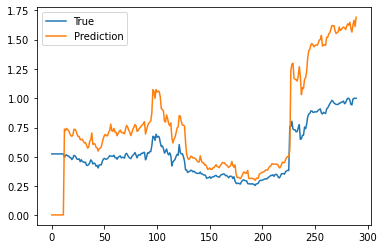

In [ ]:
#뒤에 자른 데이터와 그래프로 비교한다
pred=model.predict(x_test)
fig=plt.figure(facecolor='white')
ax=fig.add_subplot(111)
ax.plot(y_test,label='True')
ax.plot(pred,label='Prediction')
ax.legend()
plt.show()

In [ ]:
print(x_train,y_train)

[[[0.14582133]
  [0.16430596]
  [0.13976261]
  [0.5752197 ]]

 [[0.18587896]
  [0.19263457]
  [0.14569733]
  [0.6990668 ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 ...

 [[0.09193084]
  [0.09348442]
  [0.09287834]
  [0.24780926]]

 [[0.0945245 ]
  [0.09830029]
  [0.08783383]
  [1.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]] [0.15993461 0.17543182 0.17543182 0.16870661 0.147069   0.147069
 0.1131506  0.08712846 0.07981987 0.07572668 0.08128248 0.06695493
 0.06315423 0.04870994 0.04759962 0.04713185 0.04759971 0.04771667
 0.04876931 0.0473658  0.04730732 0.04783363 0.04865235 0.04455877
 0.04619635 0.04572851 0.04678114 0.04607939 0.04502675 0.04496827
 0.04572851 0.04643026 0.04607939 0.04561155 0.04648874 0.04613787
 0.0466057  0.04672266 0.04771682 0.04602091 0.042863   0.04262918
 0.04473446 0.04385727 0.04537774 0.04631341 0.04602101 0.04672277
 0.04707365 0.04783388 0.04607949 0.04602101 0.04637189 0.04742453
 0.04800932 0.0478338